In [38]:
import matplotlib.pyplot as plt
import numpy as np
from fractions import Fraction
import statistics

In [9]:
f = open("bm_log.txt", "r")

# pmaxrate

# stream_copy
# stream_scale
# stream_add
# stream_triad

for x in f:
    if "pmax =" in x:
        pmaxrate = x
    
    elif "Copy:" in x:
        stream_copy = x
    elif "Scale:" in x:
        stream_scale = x
    elif "Add:" in x:
        stream_add = x
    elif "Triad:" in x:
        stream_triad = x
    elif "pi =" in x:
        pi_steps = x
    elif "ran in" in x:
        pi_time = x
    elif "Matrix multiplication of dimensions" in x:
        mat_dim = x
    elif "Matrix multiplication runtime" in x:
        mat_time = x
    elif "Average runtime:" in x:
        mat_time = x
    elif "grayscale time" in x:
        gray_time = x
    elif "grayscale Gflops" in x:
        gray_flop = x
f.close() 

In [10]:

pmaxrate.split()[-1]
pmax = float (pmaxrate.split()[-1])
pmax



157.567632

In [30]:
mat_op_in =  float (mat_dim.split()[-3]) + float (mat_dim.split()[-5])
mat_flops = float (mat_time.split()[-1])

pi_op_in = float (pi_steps.split()[-2]) * 5 /16
pi_flops = float (pi_steps.split()[-2]) * 5 / float (pi_time.split()[-2]) / 1000000000

gray_op_in = 3
gray_flops= float (gray_flop.split()[-1])



In [31]:

b_s = (float(stream_copy.split()[1]) + float(stream_scale.split()[1]) + float(stream_add.split()[1]) + float(stream_triad.split()[1])) / 4  / 1000

b_s




29.123050000000003

In [38]:
P_max = pmax


def ap(i):
    return min(P_max, b_s*i)


# ai_list = [1/16., 1/8., 1/4., 1/2., 1, 2, 3, 4, 6, 8, 16, 32, 64, 128, 256]

ai_list = [0]
p = []

# ai_list = [2**i for i in range(-4,27)]
# p = [ap(x) for x in ai_list]

for i in range(-4,31):
    ai_list.append(2**i)

p = [ap(x) for x in ai_list]
    
p

[0.0,
 1.8201906250000002,
 3.6403812500000003,
 7.280762500000001,
 14.561525000000001,
 29.123050000000003,
 58.246100000000006,
 116.49220000000001,
 157.567632,
 157.567632,
 157.567632,
 157.567632,
 157.567632,
 157.567632,
 157.567632,
 157.567632,
 157.567632,
 157.567632,
 157.567632,
 157.567632,
 157.567632,
 157.567632,
 157.567632,
 157.567632,
 157.567632,
 157.567632,
 157.567632,
 157.567632,
 157.567632,
 157.567632,
 157.567632,
 157.567632,
 157.567632,
 157.567632,
 157.567632,
 157.567632]

In [39]:
# mclmat_intensity = 1

# mclmat_performance = p[5]

# mclpi_intensity = float(pi_results.split()[4]) / 16

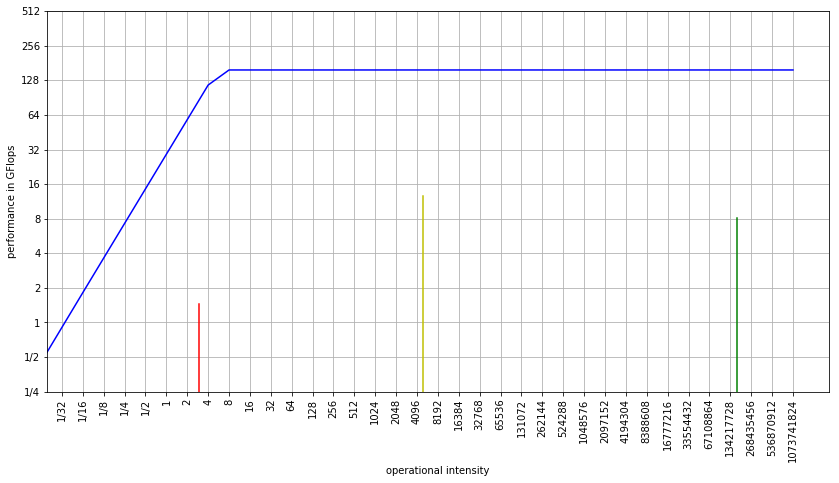

In [44]:
# plt.plot([1,2,3,4])
# plt.ylabel('some numbers')
# plt.show()

xtikkie = [2**i for i in range(-5,31)]
ytikkie = [0.25,0.5]


for i in range(10):
    ytikkie.append(2**i)
    
xtikkie_frac = [Fraction(i) for i in xtikkie]
ytikkie_frac = [Fraction(i) for i in ytikkie]

plt.plot(ai_list, p,'-b')

plt.plot((gray_op_in,gray_op_in), (0,gray_flops), 'r-')
plt.plot((pi_op_in,pi_op_in), (0,pi_flops), 'g-')
plt.plot((mat_op_in,mat_op_in), (0,mat_flops), 'y-')

plt.xscale("log", basex=2)
plt.yscale("log", basey=2)
plt.xticks(xtikkie, xtikkie_frac, rotation='vertical')
plt.yticks(ytikkie, ytikkie_frac)
plt.xlabel("operational intensity")
plt.ylabel("performance in GFlops")


fig = plt.gcf()
fig.set_size_inches(14, 7)

# fig.savefig('test2png.png', dpi=100)

# plt.plot(x,y)
plt.grid()
# ytikkie

In [78]:
ff = open("logfiles4gpus.txt", "r")

In [15]:
copyl = []
scalel = []
addl = []
triadl = []

for x in ff:
    
    if "Copy" in x:
        copyl.append(x) 
    elif "Scale:" in x:
        scalel.append(x)  
    elif "Add:" in x:
        addl.append(x) 
    elif "Triad:" in x:
        triadl.append(x) 

In [52]:
copyl

['Copy:          204997.1     0.015615     0.015610     0.015620\n',
 'Copy:          205656.7     0.015564     0.015560     0.015573\n',
 'Copy:          117819.6     0.028073     0.027160     0.030884\n',
 'Copy:          103671.1     0.031110     0.030867     0.031275\n',
 'Copy:          205483.5     0.015647     0.015573     0.015840\n',
 'Copy:          107834.9     0.029799     0.029675     0.029926\n',
 'Copy:          118540.7     0.029933     0.026995     0.030801\n',
 'Copy:          107440.4     0.030361     0.029784     0.030622\n',
 'Copy:          206546.0     0.015506     0.015493     0.015518\n',
 'Copy:          206546.0     0.015504     0.015493     0.015539\n',
 'Copy:          206533.3     0.015504     0.015494     0.015523\n',
 'Copy:          206374.5     0.015509     0.015506     0.015518\n',
 'Copy:          206517.4     0.015509     0.015495     0.015517\n',
 'Copy:          206797.4     0.015478     0.015474     0.015485\n',
 'Copy:          206530.1     0.01

In [41]:
copyv = []
scalev = []
addv = []
triadv = []

for i in range(0,32, 4):
    a = []
    for j in range(i, i+4,1):
        a.append((float(copyl[j].split()[1])  )    )

    copyv.append(statistics.mean(a))


for i in range(0,32, 4):
    a = []
    for j in range(i, i+4,1):
        a.append((float(scalel[j].split()[1])  )    )

    scalev.append(statistics.mean(a))
    
for i in range(0,32, 4):
    a = []
    for j in range(i, i+4,1):
        a.append((float(addl[j].split()[1])  )    )

    addv.append(statistics.mean(a))
    
for i in range(0,32, 4):
    a = []
    for j in range(i, i+4,1):
        a.append((float(triadl[j].split()[1])  )    )

    triadv.append(statistics.mean(a))


In [40]:
copyv

[158036.125,
 134824.875,
 206499.95,
 206554.05,
 206495.1,
 206039.225,
 105753.025,
 105751.95]

In [42]:
triadv

[156683.42500000002,
 121079.65,
 206799.025,
 206795.85,
 208997.3,
 208574.1,
 105693.65,
 105667.875]

In [43]:
scalev

[156097.075,
 130108.77500000001,
 206601.7,
 206611.25,
 208579.575,
 208039.875,
 105756.325,
 105758.825]

In [44]:
addv

[154106.75,
 133305.175,
 206741.7,
 206716.2,
 208620.1,
 208328.6,
 105749.25,
 105756.325]

In [50]:
avgs = []

for i in range(8):
    a = copyv[i] + triadv[i] + scalev[i] + addv[i]
    avgs.append(a/4)

0
1
2
3
4
5
6
7


In [51]:
avgs

[156230.84375,
 129829.61875,
 206660.59375,
 206669.33750000002,
 208173.01875000002,
 207745.44999999998,
 105738.0625,
 105733.74375000001]

In [61]:
pmax = []

for x in ff:
    print(x)
    if "pmax =" in x:
        pmax.append(x) 
        


 

 Device is  GeForce GTX TITAN X  GPU from  NVIDIA Corporation  with a max of 24 compute units 

work group, work item information

 max loc dim  1024  1024  64 

 Max work group size = 1024

This system uses 8 bytes per array element.

-------------------------------------------------------------

Array size = 50000000 (elements), Offset = 0 (elements)

Memory per array = 381.5 MiB (= 0.4 GiB).

Total memory required = 1144.4 MiB (= 1.1 GiB).

Each kernel will be executed 10 times.

 The *best* time for each kernel (excluding the first iteration)

 will be used to compute the reported bandwidth.

-------------------------------------------------------------

Your clock granularity appears to be less than one microsecond.

Each test below will take on the order of 148838 microseconds.

   (= 148838 clock ticks)

Increase the size of the arrays if this shows that

you are not getting at least 20 clock ticks per test.

-------------------------------------------------------------

WARN

Array size = 50000000 (elements), Offset = 0 (elements)

Memory per array = 381.5 MiB (= 0.4 GiB).

Total memory required = 1144.4 MiB (= 1.1 GiB).

Each kernel will be executed 10 times.

 The *best* time for each kernel (excluding the first iteration)

 will be used to compute the reported bandwidth.

-------------------------------------------------------------

Your clock granularity appears to be less than one microsecond.

Each test below will take on the order of 161859 microseconds.

   (= 161859 clock ticks)

Increase the size of the arrays if this shows that

you are not getting at least 20 clock ticks per test.

-------------------------------------------------------------

WARNING -- The above is only a rough guideline.

For best results, please be sure you know the

precision of your system timer.

-------------------------------------------------------------

Function    Best Rate MB/s  Avg time     Min time     Max time

Copy:          105757.4     0.030263     0.030258 

In [67]:
avv = []
for i in range(0,32,4):
    ab = []
    ab.append(float(pmax[i].split()[2]))
    ab.append(float(pmax[i+1].split()[2]))
    ab.append(float(pmax[i+2].split()[2]))
    ab.append(float(pmax[i+3].split()[2]))
    avv.append(statistics.mean(ab))
    


In [68]:
avv

[1664.2649350000002,
 1662.43112825,
 3253.53474525,
 3255.8227375,
 3903.00652775,
 3910.0115095,
 699.3538430000001,
 699.35494025]

In [72]:
grays = []

for x in ff:
    if "grayscale Gflops" in x:
        grays.append(x) 

 

 Device is  GeForce GTX TITAN X  GPU from  NVIDIA Corporation  with a max of 24 compute units 

work group, work item information

 max loc dim  1024  1024  64 

 Max work group size = 1024

This system uses 8 bytes per array element.

-------------------------------------------------------------

Array size = 50000000 (elements), Offset = 0 (elements)

Memory per array = 381.5 MiB (= 0.4 GiB).

Total memory required = 1144.4 MiB (= 1.1 GiB).

Each kernel will be executed 10 times.

 The *best* time for each kernel (excluding the first iteration)

 will be used to compute the reported bandwidth.

-------------------------------------------------------------

Your clock granularity appears to be less than one microsecond.

Each test below will take on the order of 148838 microseconds.

   (= 148838 clock ticks)

Increase the size of the arrays if this shows that

you are not getting at least 20 clock ticks per test.

-------------------------------------------------------------

WARN

In [73]:
grays

['grayscale Gflops is 2.382149 \n',
 'grayscale Gflops is 2.383369 \n',
 'grayscale Gflops is 1.766204 \n',
 'grayscale Gflops is 1.760327 \n',
 'grayscale Gflops is 1.754069 \n',
 'grayscale Gflops is 2.319604 \n',
 'grayscale Gflops is 2.324209 \n',
 'grayscale Gflops is 1.780683 \n',
 'grayscale Gflops is 2.418562 \n',
 'grayscale Gflops is 2.428908 \n',
 'grayscale Gflops is 2.432499 \n',
 'grayscale Gflops is 1.298337 \n',
 'grayscale Gflops is 1.737357 \n',
 'grayscale Gflops is 2.387768 \n',
 'grayscale Gflops is 2.389404 \n',
 'grayscale Gflops is 2.387094 \n',
 'grayscale Gflops is 1.273312 \n',
 'grayscale Gflops is 1.282769 \n',
 'grayscale Gflops is 1.275344 \n',
 'grayscale Gflops is 1.275792 \n',
 'grayscale Gflops is 1.275559 \n',
 'grayscale Gflops is 1.274289 \n',
 'grayscale Gflops is 1.274406 \n',
 'grayscale Gflops is 1.270909 \n',
 'grayscale Gflops is 1.974265 \n',
 'grayscale Gflops is 1.974192 \n',
 'grayscale Gflops is 1.962044 \n',
 'grayscale Gflops is 1.9614

In [74]:
gvv = []
for i in range(0,32,4):
    ab = []
    ab.append(float(grays[i].split()[3]))
    ab.append(float(grays[i+1].split()[3]))
    ab.append(float(grays[i+2].split()[3]))
    ab.append(float(grays[i+3].split()[3]))
    gvv.append(statistics.mean(ab))

In [75]:
gvv

[2.07301225,
 2.04464125,
 2.1445765,
 2.2254057499999997,
 1.27680425,
 1.27379075,
 1.96799975,
 1.9534354999999999]

In [84]:
ff = open("logfiles4gpus.txt", "r")
    
mats = []

for x in ff:
    if "Matrix multiplication runtime:" in x:
        mats.append(x) 

In [88]:
mats

['Matrix multiplication runtime: 0.289435 seconds\n',
 'Matrix multiplication runtime: 0.289971 seconds\n',
 'Matrix multiplication runtime: 0.289475 seconds\n',
 'Matrix multiplication runtime: 0.289848 seconds\n',
 'Matrix multiplication runtime: 0.290359 seconds\n',
 'Matrix multiplication runtime: 0.289596 seconds\n',
 'Matrix multiplication runtime: 0.295134 seconds\n',
 'Matrix multiplication runtime: 0.295274 seconds\n',
 'Matrix multiplication runtime: 0.295185 seconds\n',
 'Matrix multiplication runtime: 0.290182 seconds\n',
 'Matrix multiplication runtime: 0.289773 seconds\n',
 'Matrix multiplication runtime: 0.289760 seconds\n',
 'Matrix multiplication runtime: 0.034914 seconds\n',
 'Matrix multiplication runtime: 0.000385 seconds\n',
 'Matrix multiplication runtime: 0.000408 seconds\n',
 'Matrix multiplication runtime: 0.031859 seconds\n',
 'Matrix multiplication runtime: 0.000426 seconds\n',
 'Matrix multiplication runtime: 0.000403 seconds\n',
 'Matrix multiplication runt

In [96]:
mvv = []
for i in range(0,96,12):
    ab = []
    ab.append(float(mats[i].split()[3]))
    ab.append(float(mats[i+3].split()[3]))
    ab.append(float(mats[i+6].split()[3]))
    ab.append(float(mats[i+10].split()[3]))
    print(ab)
    mvv.append(statistics.mean(ab))

[0.289435, 0.289848, 0.295134, 0.289773]
[0.034914, 0.031859, 0.038524, 0.000508]
[0.252577, 0.248334, 0.246581, 0.246381]
[0.024727, 0.027807, 0.025457, 0.000487]
[0.159119, 0.158616, 0.159393, 0.152226]
[0.027039, 0.027264, 0.02917, 0.000541]
[0.524804, 0.524701, 0.524934, 0.527523]
[0.10602, 0.278062, 0.098331, 0.000394]


In [97]:
print(mvv)

for i in mvv:
    print(2500**3 / i / 1000000000)

[0.2910475, 0.02645125, 0.24846825, 0.019619499999999998, 0.1573385, 0.0210035, 0.5254905, 0.12070175]
53.685394995662215
590.7093237559662
62.88529822220747
796.4015392848953
99.30817949834274
743.9236317756564
29.734124594069733
129.45131284343435


In [98]:
ff = open("logfiles4gpus.txt", "r")
    
pipi = []

for x in ff:
    if "calculation ran in" in x:
        pipi.append(x) 

In [99]:
pipi

['The calculation ran in   33.420478 seconds\n',
 'The calculation ran in   33.335287 seconds\n',
 'The calculation ran in   32.864689 seconds\n',
 'The calculation ran in   33.296101 seconds\n',
 'The calculation ran in    0.005505 seconds\n',
 'The calculation ran in    0.005430 seconds\n',
 'The calculation ran in    0.005443 seconds\n',
 'The calculation ran in    0.005495 seconds\n',
 'The calculation ran in   19.184770 seconds\n',
 'The calculation ran in   19.082840 seconds\n',
 'The calculation ran in   19.372061 seconds\n',
 'The calculation ran in   19.259624 seconds\n',
 'The calculation ran in    0.002895 seconds\n',
 'The calculation ran in    0.003342 seconds\n',
 'The calculation ran in    0.003383 seconds\n',
 'The calculation ran in    0.002921 seconds\n',
 'The calculation ran in   25.124356 seconds\n',
 'The calculation ran in   25.126744 seconds\n',
 'The calculation ran in   25.276556 seconds\n',
 'The calculation ran in   25.243035 seconds\n',
 'The calculation ra

In [105]:
pvv = []
for i in range(0,32,4):
    ab = []
    ab.append(1342177280 * 3 / 1000000000 / float(pipi[i].split()[4]))
    ab.append(1342177280 * 3 / 1000000000 / float(pipi[i+1].split()[4]))
    ab.append(1342177280 * 3 / 1000000000 / float(pipi[i+2].split()[4]))
    ab.append(1342177280 * 3 / 1000000000 / float(pipi[i+3].split()[4]))
    pvv.append(statistics.mean(ab))

In [106]:
pvv

[0.12117984181108353,
 736.3730879192431,
 0.209450732790242,
 1291.0966655971968,
 0.15983065205814115,
 1604.1763535807008,
 0.09557831880788786,
 368.54514841843053]

In [107]:
ff = open("logfiles4gpus.txt", "r")
    
knni = []

for x in ff:
    if "knn time is" in x:
        knni.append(x) 

In [108]:
knni

['knn time is: 4.810747\n',
 'knn time is: 4.811186\n',
 'knn time is: 4.842589\n',
 'knn time is: 5.405350\n',
 'knn time is: 4.803406\n',
 'knn time is: 4.840199\n',
 'knn time is: 5.528216\n',
 'knn time is: 5.362069\n',
 'knn time is: 4.538686\n',
 'knn time is: 4.687164\n',
 'knn time is: 4.722910\n',
 'knn time is: 4.728248\n',
 'knn time is: 5.473913\n',
 'knn time is: 4.957639\n',
 'knn time is: 4.691638\n',
 'knn time is: 6.212956\n',
 'knn time is: 4.952519\n',
 'knn time is: 5.080667\n',
 'knn time is: 4.792667\n',
 'knn time is: 4.797873\n',
 'knn time is: 4.801514\n',
 'knn time is: 4.799545\n',
 'knn time is: 4.794885\n',
 'knn time is: 4.789042\n',
 'knn time is: 5.373512\n',
 'knn time is: 5.435133\n',
 'knn time is: 5.190478\n',
 'knn time is: 5.208165\n',
 'knn time is: 5.356913\n',
 'knn time is: 5.180604\n',
 'knn time is: 5.360268\n',
 'knn time is: 5.368368\n']

In [109]:
nvv = []
for i in range(0,32,4):
    ab = []
    ab.append(float(knni[i].split()[3]))
    ab.append(float(knni[i+1].split()[3]))
    ab.append(float(knni[i+2].split()[3]))
    ab.append(float(knni[i+3].split()[3]))
    print(ab)
    nvv.append(statistics.mean(ab))

[4.810747, 4.811186, 4.842589, 5.40535]
[4.803406, 4.840199, 5.528216, 5.362069]
[4.538686, 4.687164, 4.72291, 4.728248]
[5.473913, 4.957639, 4.691638, 6.212956]
[4.952519, 5.080667, 4.792667, 4.797873]
[4.801514, 4.799545, 4.794885, 4.789042]
[5.373512, 5.435133, 5.190478, 5.208165]
[5.356913, 5.180604, 5.360268, 5.368368]


In [110]:
nvv

[4.967468,
 5.1334725,
 4.669252,
 5.3340365,
 4.9059314999999994,
 4.7962465000000005,
 5.301822,
 5.31653825]